# HW 2: Wrangling

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [39]:
import pandas as pd
import numpy as np

#Q1.1
print("Question 1.1")
airbnb = pd.read_csv("airbnb_hw.csv")
#First, I want to make sure that all the price values are numeric so that they can be used for their intended purpose.
#To do that, I want to get rid of any non-numeric characters, like $ and ,
airbnb['Price'] = airbnb['Price'].astype(str).str.replace('$', '', regex=False)
airbnb['Price'] = airbnb['Price'].astype(str).str.replace(',', '', regex=False)
#Next, I want to convert the values to actual numbers instead of strings. The errors = 'coerce' handles situations where there's a comma, like in 1,112 and parses it as 1112
airbnb['Price'] = pd.to_numeric(airbnb['Price'],errors = 'coerce')
#I want to find the number of missing values
missingValuesPrice = airbnb['Price'].isna().sum()
print("Number of missing values in Price: " + str(missingValuesPrice))
#There are 181 missing values

#Q1.2
print("Question 1.2")
mnPolice = pd.read_csv("mn_police_use_of_force.csv")
#First, I want to find the unique values in subject_injury
print("Unique values of subject_injury: ",mnPolice['subject_injury'].unique())

#Next, I want to clean the subject_cleaned variable by stripping any whitespace and filling nan values with "Unknown"
mnPolice['subject_injury_cleaned'] = mnPolice['subject_injury'].astype(str).str.strip().fillna('Unknown')

#I want to find the number of 'Unknown' values
numUnknownInjury = (mnPolice['subject_injury_cleaned'] == 'Unknown').sum()
print("Number of unknown values in subject_injury: " + str(numUnknownInjury))

#I want to calculate the proportion of unknown values
proportionUnknown = numUnknownInjury/len(mnPolice['subject_injury_cleaned'])
print("Proportion of unknown values in subject_injury: " + str(proportionUnknown))

#I want to cross-tabulate with force_injury
crosstab = pd.crosstab(mnPolice['subject_injury_cleaned'], mnPolice['force_type'], dropna = False)
print("Cross-tabulation of subject_injury_cleaned with force_type")
display(crosstab)

#From the cross-tabulation, I see that for most force types, the Unknown/nan marker has the highest values. This is especially noticable for the Bodily Force, Chemical Irritant, Maximal Restraint Technique, and Taser variables.
#The cross-tabulation results along with the proportion of values that are missing are especially concerning because this data is crucial to studies about the use of police force and whether or not it is justified. If we don't know whether or not the subject was injured, decision-making capabilities can go down severely.

#Q1.3
print("Question 1.3 and 1.4")
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_parquet("justice_data.parquet")
#I want to first clean it by getting rid of any whitespace and replacing missing values with np.nan
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].astype(str).str.strip().fillna(np.nan)

#Q1.4

print("Number of missing values in 'ImposedSentenceAllChargeInContactEvent' before cleaning: " +str((df['ImposedSentenceAllChargeInContactEvent']==' ').sum()))
print("Unique values in 'ImposedSentenceAllChargeInContactEvent': ", df['ImposedSentenceAllChargeInContactEvent'].unique())
print("Unique values of 'SentenceTypeAllChargesAtConvictionInContactEvent': ", df['SentenceTypeAllChargesAtConvictionInContactEvent'].unique())

#First, I want to convert all values in ImposedSentence... to numeric values, coercing any non-numeric values to NaN
df['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df['ImposedSentenceAllChargeInContactEvent'], errors='coerce')
initialNanCount = df['ImposedSentenceAllChargeInContactEvent'].isna().sum()
print("Number of NaN values after initial numeric conversion: ",initialNanCount)

#Then, I want to fill in missing values based on SentenceType..., where if sentenceType is no sentence imposed (4), then the imposed sentence is 0, in order to differentiate between missing values and true sentences of 0 years
rowsWithZero = (df['ImposedSentenceAllChargeInContactEvent'].isna()) & (df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4)
numFilledZero = rowsWithZero.sum()
df.loc[rowsWithZero,'ImposedSentenceAllChargeInContactEvent'] = 0
print("Number of NaN values filled with 0 based on SentenceType == 4: ",numFilledZero)

#Finally, I want to replace any remaining missing values with np.nan if any were not covered by no sentence imposed
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].fillna(np.nan)

print("Number of missing values in 'ImposedSentenceAllChargeInContactEvent' after cleaning: " +str(df['ImposedSentenceAllChargeInContactEvent'].isna().sum()))
#The number has reduced from 9053 to 274

Question 1.1
Number of missing values in Price: 0
Question 1.2
Unique values of subject_injury:  [nan 'No' 'Yes']
Number of unknown values in subject_injury: 0
Proportion of unknown values in subject_injury: 0.0
Cross-tabulation of subject_injury_cleaned with force_type


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury_cleaned,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
nan,2,7051,1421,0,27,74,87,0,170,31,985


Question 1.3 and 1.4
Number of missing values in 'ImposedSentenceAllChargeInContactEvent' before cleaning: 9053
Unique values in 'ImposedSentenceAllChargeInContactEvent':  [' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102' '65' '200' '57'
 '24.3285420944559' '12.1642710472279' '117' '81.4928131416838'
 '22.4928131416838' '1980' '3.6570841889117' '56' '10' '2.7926078028747

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Summary statistics of Year before filtering:
count    7068.000000
mean     1935.953311
std       270.740135
min         0.000000
25%      1948.000000
50%      1986.000000
75%      2010.000000
max      2026.000000
Name: Year, dtype: float64
Summary statistics of Year after filtering:
count    5534.000000
mean     1992.384171
std        24.217153
min      1940.000000
25%      1970.000000
50%      2000.000000
75%      2013.000000
max      2026.000000
Name: Year, dtype: float64
Proportion of male victims: 0.7873147813516443
['Unprovoked' 'Provoked' 'Unknown']
Proportion of unprovoked attacks:  0.7448500180701121
Unique Value of (Fatal Y/N) before cleaning:  ['n' 'y' 'f' 'm' 'nan' 'nq' 'unknown' '2017' 'y x 2']
Unique Value of (Fatal Y/N) after cleaning:  ['N' 'Y' 'Unknown']
Proportion of Unprovoked Attacks on Women:  0.14968461911693354
Proportion of Unprovoked Attacks on Men:  0.8158660844250364
Proportion of Provoked Attacks that are Fatal:  0.0248565965583174
Proportion of Unprovoked At

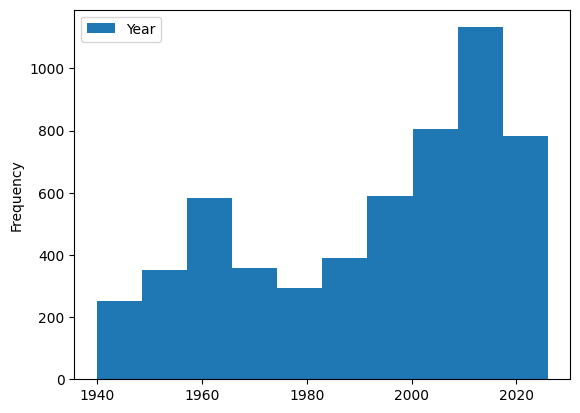

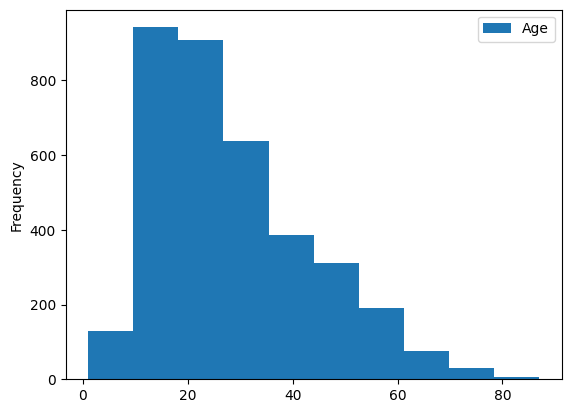

In [29]:
import pandas as pd
import numpy as np
import matplotlib as plt

#Q2.1
sharks = pd.read_excel("GSAF5.xls")

#Q2.2
sharks_cleaned = sharks.dropna(axis=1, how='all')

#Q2.3
summaryStats = sharks_cleaned['Year'].describe()
print("Summary statistics of Year before filtering:")
print(summaryStats)
#The range is 2026 years, since the minimum value is 0. This value was assigned to incidents that didn't have an exact date to them, resulting in such a large range
sharks_cleaned = sharks_cleaned[sharks_cleaned['Year'] >= 1940]
print("Summary statistics of Year after filtering:")
print(sharks_cleaned['Year'].describe())

sharks_cleaned['Year'] = pd.to_numeric(sharks_cleaned['Year'],errors = 'coerce')
sharks_cleaned.plot(kind='hist',y='Year')
#The number of incidents from 1940 until 2026 increase until a peak in the 1960s, decrease until the 1980s, pick up again until the 2010s, and have decreased since then.

#Q2.4
sharks_cleaned['Age'] = sharks_cleaned['Age'].astype(str).str.replace(' ', '', regex=False)
sharks_cleaned['Age'] = pd.to_numeric(sharks_cleaned['Age'],errors = 'coerce')
sharks_cleaned.plot(kind='hist',y='Age')

#Q2.5
sharks_cleaned['Sex'] = sharks_cleaned['Sex'].astype(str).str.strip().str.lower()

def clean_type_0(type_str):
    if 'm' in type_str:
        return 'M'
    elif 'f' in type_str:
        return 'F'
    else:
        return 'Unknown'
sharks_cleaned['Sex'] = sharks_cleaned['Sex'].apply(clean_type_0)

print("Proportion of male victims: " + str((sharks_cleaned['Sex']=='M').sum()/len(sharks_cleaned['Sex'])))
#Proportion of male victims: 0.7873147813516443

#Q2.6
sharks_cleaned['Type'] = sharks_cleaned['Type'].astype(str).str.strip().str.lower()

def clean_type(type_str):
    if 'unprovoked' in type_str:
        return 'Unprovoked'
    elif 'provoked' in type_str:
        return 'Provoked'
    else:
        return 'Unknown'

sharks_cleaned['Type'] = sharks_cleaned['Type'].apply(clean_type)

print(sharks_cleaned['Type'].unique()) #to make sure there are only three kinds of answers: provoked, unprovoked, unknown

proportion_unprovoked = (sharks_cleaned['Type'] == 'Unprovoked').sum() / len(sharks_cleaned['Type'])
print("Proportion of unprovoked attacks: ",proportion_unprovoked)
#Proportion of unprovoked attacks is 0.7448500180701121

#Q2.7
sharks_cleaned['Fatal Y/N'] = sharks_cleaned['Fatal Y/N'].astype(str).str.strip().str.lower()
print("Unique Value of (Fatal Y/N) before cleaning: ",sharks_cleaned['Fatal Y/N'].unique())

def clean_type_2(type_str):
    if 'n' in type_str:
        return 'N'
    elif 'y' in type_str:
        return 'Y'
    else:
        return 'Unknown'

sharks_cleaned['Fatal Y/N'] = sharks_cleaned['Fatal Y/N'].apply(clean_type_2)
print("Unique Value of (Fatal Y/N) after cleaning: ",sharks_cleaned['Fatal Y/N'].unique())

#Q2.8

totalUnprovoked = len(sharks_cleaned[sharks_cleaned['Type'] == 'Unprovoked'])

unprovokedWomen = len(sharks_cleaned[(sharks_cleaned['Type'] == 'Unprovoked') & (sharks_cleaned['Sex'] == 'F')])
unProvokedMen = len(sharks_cleaned[(sharks_cleaned['Type'] == 'Unprovoked') & (sharks_cleaned['Sex'] == 'M')])

print("Proportion of Unprovoked Attacks on Women: ", unprovokedWomen/totalUnprovoked)
print("Proportion of Unprovoked Attacks on Men: ", unProvokedMen/totalUnprovoked)
#sharks are more likely to launch unprovoked attacks on males

provokedAndFatal = len(sharks_cleaned[(sharks_cleaned['Fatal Y/N'] == 'Y') & (sharks_cleaned['Type'] == 'Provoked')])
notProvokedAndFatal = len(sharks_cleaned[(sharks_cleaned['Fatal Y/N'] == 'Y') & (sharks_cleaned['Type'] == 'Unprovoked')])

totalProvoked = len(sharks_cleaned[sharks_cleaned['Type'] == 'Provoked'])
totalUnprovoked = len(sharks_cleaned[sharks_cleaned['Type'] == 'Unprovoked'])

print("Proportion of Provoked Attacks that are Fatal: ", provokedAndFatal/totalProvoked)
print("Proportion of Unprovoked Attacks that are Fatal: ", notProvokedAndFatal/totalUnprovoked)
#unprovoked attacks tend to be more fatal

fatalAndMale = len(sharks_cleaned[(sharks_cleaned['Fatal Y/N'] == 'Y') & (sharks_cleaned['Sex'] == 'M')])
fatalAndFemale = len(sharks_cleaned[(sharks_cleaned['Fatal Y/N'] == 'Y') & (sharks_cleaned['Sex'] == 'F')])

totalFatalities = len(sharks_cleaned[sharks_cleaned['Fatal Y/N'] == 'Y'])

print("Proportion of Fatal Accidents Occurring to Males: ", fatalAndMale/totalFatalities)
print("Proportion of Fatal Accidents Occurring to Females: ", fatalAndFemale/totalFatalities)
#fatal accidents tend to occur more to males

#In general, I would rather stay away from sharks! Even though I am not a male, even unprovoked attacks can be fatal, so I'd rather not test my luck!

#Q2.9
sharks_cleaned['Species '] = sharks_cleaned['Species '].astype(str).str.strip().str.lower()
whiteSharks = sharks_cleaned[sharks_cleaned['Species '].str.contains('white')]
print("Proportion of white sharks: ", len(whiteSharks)/len(sharks_cleaned['Species ']))
#The proportion of white sharks attacks is 0.12902059992771955



**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. Based on the abstract, this paper is about data tidying, which are easy to make models/conclusions off of since they have a specific structure, where each variable is a column, each variable is a row, and each type of observational unit is a table. The advantages of tidy datasets are shown in the paper using a case study.

2. The tidy data standard was created to simplify the initial exploration of the datasets and the development of data analysis tools. This allows the developer to focus on the problems and trends within the data rather than the cleaning logistics.

3. The "Like families..." sentence is about how while tidy datasets follow a clear structure (as outlined above), messy datasets have infinitely different ways of being messy. There's no one way for a dataset to be messy. The "For a given dataset..." sentence means that while we can identify variables and observations when provided in a dataset, it's hard to provide definitions for them without any example to base it off of. Variables and observations are difficult to define when considering the large range of data developers like to study.

4. Wickham describes a dataset as a collection of values. He defines values as being either numbers or strings. He says that every value belongs to a variable, which contains all values that measure the same underlying attribute as well as an observation, which contains all values measured on the same unit.

5. In section 2.3, tidy data is defined as a standard way of mapping the meaning of a dataset to its structure. He repeats his description of the structure of tidy data, where each variable forms a column, each observation forms a row, and each type of observational unit forms a table.

6. The five most common problems with messy data are:
- column headers are values, not variable names
- multiple variables are stored in one column
- variables are stored in both rows and columns
- multiple types of observational units are stored in the same table
- a single observational unit is stored in multiple tables

The data in Table 4 are messy because the column headers are values instead of variable names. To remedy this, we have to "melt" the data by turning columns into rows (colloquially called making wide datasets tall).

7. Table 11 is messy because there are columns where the headers are values/day numbers rather than variable names. Table 12a is the molten version because the column headers are no longer values but variable names, and Table 12b is the tidy version because the element column is eliminated and the tmax and tmin values are column headers themselves. Each variable is a column, each observation is a row, and each OU forms a table.

8. The chicken-and-egg problem is that if tidy data is only as useful as the tools that work with it, then tidy tools will be linked to tidy data. This creates a workflow that cannot be improved by independent data structures or tools. Wickham hopes that in the future, others will build upon his framework in order to build better strategies and tools. He also hopes that people will create new frameworks in order to optimize performance and take advantage of different data cleaning tools.